# Overiew and introduction
* Now that we've spent some time cleaning and working with the Ames Data Set, we're ready to let you test your new Regression skills on it to create a house sale price prediction model
* However, there are two more general topics we want to learn before we jump to the project
* Section Overview
    * Cross Validation in Detial
        * Train | Test Split
        * Train | Validation | Test Split
        * Scikit-Learn cross_val_score
        * Scikit-Learn cross_validate
    * Grid Search
    * Linear Regression Project Exercise
* We've already discussed models with built-in cross validation (e.g. RidgeCV)
* We will expand on this by exploring Scikit-Learn's general tools for utilizing cross-validation for any model
* This will also allow us to later perform grid searches for the optimal combination of multiple hyperparameters.
* We'll begin by reviewing the most basic cross validation process we know so far (Train|Test split) and then slowly build up to the full k-fold cross validation

# Cross Validation - Train | Test Split
* Begin with the data set
* Split into two sets Train and Test (Typically 70/30)
* Train the model then evaluate error on Test
* We "allow" ourselves model adjustments based on the Error or performance from the test set
* Let's briefly review this process!
* We'll later expand on it until we reach full k-fold cross validation

---
### Import environment

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mpl.rcParams.update({"figure.facecolor": "white",
                     "figure.figsize": [16,11]})

In [4]:
df = pd.read_csv(r"..\Course-2021\DATA\Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Train | Test Split Procedure
0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Test Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
7. Adjust Parameters as Necessary and repeat steps 5 and 6

In [6]:
X = df.drop("sales", axis=1)

In [7]:
y = df['sales']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scale the data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train = scaler.transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import Ridge

In [16]:
model = Ridge(alpha=100)

In [17]:
model.fit(X_train, y_train)

Ridge(alpha=100)

In [18]:
y_pre = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(y_test, y_pre)

7.341775789034128

* Adjust your hyper parameter based off your test set performance

In [21]:
model_two = Ridge(alpha=1)

In [22]:
model_two.fit(X_train,y_train)

Ridge(alpha=1)

In [23]:
y_pre = model_two.predict(X_test)

In [24]:
mean_squared_error(y_test, y_pre)

2.3190215794287514

* The advantages and disadvantages of a simple trained test play?
    * Advantages
        * Very simple to understand what doing in here
    * Disadvantages
        * Quite tedious (Could run the for loop)
        * The mean squared error could not be most fair evaluation or report of this performance metric (Because is not the first time the model training) (The alpha is changed by the X_test) => Not the fair model

# Cross Validation - Train | Validation | Test Split
* We just saw that Train | Test split method has a disadvantage of not having a portion of data that can report a performance metric on truly "unseen" data.
* While adjusting hyper parameters on test  data is a fair technique and not typically referred to as "data leakage", it is a potential issue in regards to reporting.
* If we want a truly fair and final set of performance metrics, we should get these metrics from a **final** test set that we do not allow ourselves to adjust on
* Let's quickly review this process in theory and application!
* Begin with the normal data set
* Split into: Train, Validation, and Test
* The Validation should have a great percentage in the case of less value of data set
* Set aside Test set for final metric
* Fit the model on Train set
* Evaluate performance on validation set (Get some error)
* Adjust hyperparameters as needed
* Repeat the process as necessary (train, validate, and adjust)
* When satisfy with it, perform final evaluation on Test set
* In the Final evaluation, do not adjust! report this as final metric!
* Recall the entire reason to not adjust after the final test data set is to get the fairest evaluation of the model
* The model was not fitted to the final test data **and** the model hyperparameters were not adjusted based off final test data
* This is truly never seen before data
* To achieve this in Python with Scikit-Learn we simply perform the **train_test_split()** function call twice
    * Once to split off larger training set
    * Second time to split remaining data into a validation set and test set

### TRain | Validation | Test Split Procedure
* This often also called a "hold-out" set, since you should not adjust parameters based on the final test set, but instead use it **only** for reporting final expected perfomance

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Validation/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Eval Data
4. Create model
5. Fit/train model on X train data
6. Evaluate Model on X Evaluation Data (by creating predictions and comparing to Y_eval)
7. Adjust parameters as necessary and repeat steps 5 and 6
8. Get final metrics on Test set (not allowed to go back and adjust after this!)

In [25]:
X = df.drop('sales', axis=1)

In [26]:
y = df["sales"]

In [27]:
from sklearn.model_selection import train_test_split

* First split:` X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101)`


In [28]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101)

* Second split: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)`
* `test_size = 0.5` (50% of 30% other ---> test = 15% of all data)

In [29]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [30]:
len(df)

200

In [31]:
len(X_train)

140

In [32]:
len(X_eval)

30

In [33]:
len(X_test)

30

In [34]:
from sklearn.preprocessing import StandardScaler

* The model is trained in validate data

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train = scaler.transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

In [39]:
X_eval = scaler.transform(X_eval)

In [40]:
from sklearn.linear_model import Ridge

In [41]:
model_one = Ridge(alpha=100)

In [42]:
model_one.fit(X_train, y_train)

Ridge(alpha=100)

In [43]:
y_eval_pred = model_one.predict(X_eval)

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(y_eval, y_eval_pred)

7.320101458823869

In [46]:
model_two = Ridge(alpha=1)

In [47]:
model_two.fit(X_train, y_train)

Ridge(alpha=1)

In [48]:
new_pre_eval = model_two.predict(X_eval)

In [49]:
mean_squared_error(y_eval, new_pre_eval)

2.3837830750569853

* In this case the cross validation model still not fair model! Still depend on the change of data (X_eval)
* But put the test set to make it become the fair model
* Final model choose: `model_two`

In [50]:
y_final_test_pred = model_two.predict(X_test)

* A fair test set - the same percentage as the validation test

In [51]:
mean_squared_error(y_test, y_final_test_pred)

2.254260083800517

What we are actually going to deploy to the real world is going to be a model that is fit and trained to the entire dataset, just X and Y.
If you are going to train to everything you want to be able to then fairly evaluate the model on any subset of that same data it was trained on, which is why you now have this final test metric report right before you go retrain everything

# Cross Validation - using the cross_val_score function
* Acquire the cross-validation to any machine learning model
* Start with entire data set
* Split data training data and test data
* Remove Test data for final evaluation
* Choose K-Fold Split Value for Training data
* Recall larger K means more computation
* The largest possible here is a single leave one out policy where you actually perform it as many as you have
* Choose K-Fold Split Value for Training data
* Here k = 5
* Train on k-1 folds (4 folds) and validate on 1 fold
* Obtain the first combination error metric for this fold
* Repeat for another combination
* Continue for all fold combinations
* The advantage for cross-validation is you were able to evaluate your model as it was trained on all portions of the data at some point in time and validated on all portions of the data at some point in time
* Use mean (or average) error for parameter adjustment
* One you satisfy with this error, get final metrics from final test set
* The **cross_val_score** function uses a model and training set (along  with a K and chosen metric) to perform all of this for us automatically!
* This allows for K-Fold cross validation to be performed on any model

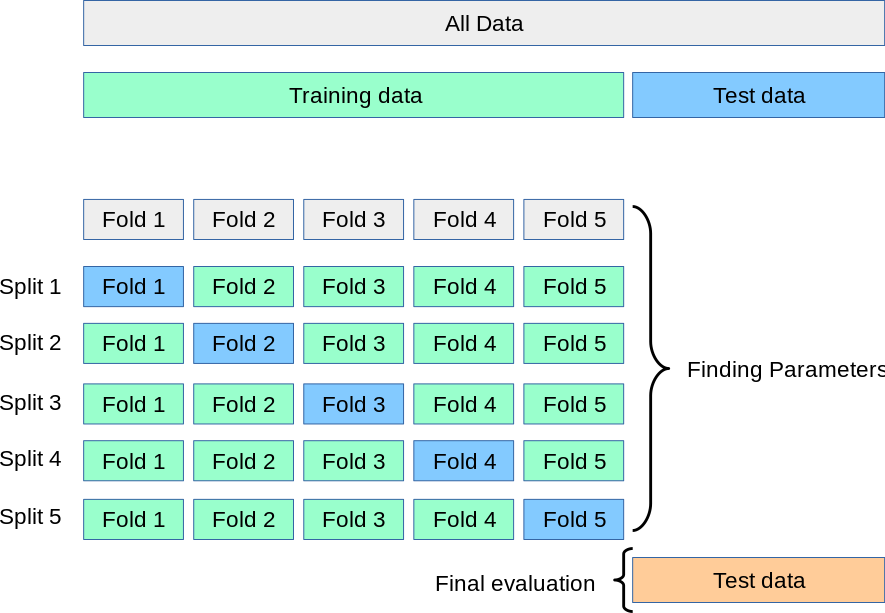

In [52]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\10-Cross-Val-and-LinReg-Project\grid_search_cross_validation.png")

In [53]:
X = df.drop("sales", axis=1)

In [54]:
y = df["sales"]

In [55]:
from sklearn.model_selection import  train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
scaler.fit(X_train)

StandardScaler()

In [60]:
X_train = scaler.transform(X_train)

In [61]:
X_test = scaler.transform(X_test)

In [62]:
model = Ridge(alpha=100)

In [63]:
from sklearn.model_selection import cross_val_score

* `estimator` is internal word for machine learning model because it's estimating some output
* X, y are going to be X train and y train
* `scoring` is just a error that is reported back
* link: `https://scikit-learn.org/stable/modules/model_evaluation.html` show all the available scoring
* `cv` is the fold value

In [64]:
scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error",
                         cv=5)

* `neg_mean_squared_error` higher is better

In [65]:
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [66]:
abs(scores.mean())

8.215396464543607

* Run another model with alpha = 1

In [67]:
model = Ridge(alpha=1)

In [68]:
scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

* The return the list of scores for each fold

In [69]:
scores

array([-3.15513238, -1.58086982, -5.40455562, -2.21654481, -4.36709384])

* It's better than alpha = 100

* Assume that you are satisfied with the evaluation of score

In [70]:
abs(scores.mean())

3.344839296530695

* The model above is only fit within **cross validation** score in order to produce these `scores` back out
* We need to do is fit the model on all the training data again to perform that final
* You need to fit again to do the sort of prediction on some final test set

In [71]:
model.fit(X_train, y_train)

Ridge(alpha=1)

* Test on final data

In [72]:
y_final_test_pred = model.predict(X_test)

In [73]:
mean_squared_error(y_test, y_final_test_pred)

2.3190215794287514

# Cross validation - using the cross_validate function
* The "cross_validate" function allows us to view multiple performance metrics from cross validation on a model and explore how much time fitting and testing took
* The only tradeoff with cross validation is just more computational time
* Let's quickly review how to use this function call!

In [74]:
## CREATE X AND Y
X = df.drop("sales", axis=1)
y = df["sales"]

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.model_selection import cross_validate

In [76]:
model = Ridge(alpha=100)

* Using the `cross_validate` to check if cross validation is reasonable or not
* Checking the for the available scoring: https://scikit-lear.org/stable/modules/model_evaluation.html
* We are doing the `regression` task

In [77]:
scores = cross_validate(model, X_train, y_train,
                        scoring=["neg_mean_absolute_error", "neg_mean_squared_error"], cv=10)

In [78]:
scores

{'fit_time': array([0.00099802, 0.        , 0.0009985 , 0.        , 0.00082588,
        0.00099421, 0.00099683, 0.00099754, 0.00099754, 0.0009973 ]),
 'score_time': array([0.        , 0.00099707, 0.        , 0.00125909, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'test_neg_mean_absolute_error': array([-1.8102116 , -2.54195751, -1.46959386, -1.86276886, -2.52069737,
        -2.45999491, -1.45197069, -2.37739501, -2.44334397, -1.89979708]),
 'test_neg_mean_squared_error': array([ -6.06067062, -10.62703078,  -3.99342608,  -5.00949402,
         -9.14179955, -13.08625636,  -3.83940454,  -9.05878567,
         -9.05545685,  -5.77888211])}

* Transfer it into the DataFrame to display more clear

In [79]:
scores =pd.DataFrame(scores)

In [80]:
scores

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.000998,0.000000,-1.810212,-6.060671
1,0.000000,0.000997,-2.541958,-10.627031
2,0.000998,0.000000,-1.469594,-3.993426
3,0.000000,0.001259,-1.862769,-5.009494
4,0.000826,0.000000,-2.520697,-9.141800
5,0.000994,0.000000,-2.459995,-13.086256
6,0.000997,0.000000,-1.451971,-3.839405
7,0.000998,0.000000,-2.377395,-9.058786
8,0.000998,0.000000,-2.443344,-9.055457
9,0.000997,0.000000,-1.899797,-5.778882


In [81]:
scores.mean()

fit_time                        0.000781
score_time                      0.000226
test_neg_mean_absolute_error   -2.083773
test_neg_mean_squared_error    -7.565121
dtype: float64

In [82]:
model = Ridge(alpha=1)

In [83]:
scores = cross_validate(model, X_train, y_train,
                        scoring=["neg_mean_absolute_error", "neg_mean_squared_error"], cv=10)

In [84]:
scores = pd.DataFrame(scores)

In [85]:
scores

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.000993,0.000998,-1.457174,-2.962508
1,0.000997,0.000000,-1.555308,-3.057378
2,0.000997,0.000000,-1.238770,-2.173740
3,0.000998,0.000000,-0.768938,-0.833034
4,0.000998,0.000000,-1.434489,-3.464018
5,0.000000,0.000000,-1.494316,-8.232647
6,0.000997,0.000000,-1.081362,-1.905864
7,0.000997,0.000000,-1.250011,-2.765048
8,0.000000,0.000000,-1.580971,-4.989505
9,0.000000,0.000998,-1.223326,-2.846438


* Check out the mean to decide how well the data performance

In [86]:
scores.mean()

fit_time                        0.000698
score_time                      0.000200
test_neg_mean_absolute_error   -1.308467
test_neg_mean_squared_error    -3.323018
dtype: float64

In [87]:
model.fit(X_train, y_train)

Ridge(alpha=1)

In [88]:
y_final_test_pred = model.predict(X_test)

In [89]:
mean_squared_error(y_test, y_final_test_pred)

2.3190215794287514

# Grid Search
* Often more complex models have multiple adjustable hyper parameters
* A grid search is a way of training and validating a model on every possible combination of multiple hyper parameter options
* Scikit-Learn includes a **GridSearchCV** class capable of testing a dictionary of multiple hyperparameter options through cross-validation
* This allows for both cross-validation and a grid search to be performed in a generalized way for any model

In [90]:
df = pd.read_csv("..\Course-2021\DATA\Advertising.csv")

In [91]:
## CREATE X AND Y
X = df.drop("sales", axis=1)
y = df["sales"]

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

* Let's imagine we're using a model that actually has two or more hyper parameters to adjust
* What we could do is test every single combination of those two hyper parameters that we define
* Let's explore the model that have multiple hyperparameters
* Use the Elastic model to figure out how much we should use of regression, essentially how much the use of the squared penalty term versus the absolute value penalty term

In [92]:
from sklearn.linear_model import ElasticNet

In [93]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet 

* Find out the optimal L1 value
* Don't want to run a for loop that constantly checks through every single combination
* Luckily for us, there is a grid search CV class, which does all that work for us behind the scences

In [94]:
base_elastic_net_model = ElasticNet()

* The key should match exactly the spell inside the ElasticNet
* Check the documentation for the good of `alpha` and `l1_ratio` for hyper parameter
* **Keep in mind, every combination in the `param_grid` will run** (0.1 with all the l1_ratio)

In [95]:
param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100],
              'l1_ratio': [.1,.5,.7,.95,.99,1]}

* Grid research

In [96]:
from sklearn.model_selection import GridSearchCV

`verbose` is just how much messaging or string output do you want to see during training? The higher the number, the more information it's going to play back to you

In [102]:
grid_model = GridSearchCV(estimator=base_elastic_net_model, param_grid=param_grid,
                          scoring="neg_mean_squared_error",
                          cv=5,
                          verbose=2)

In [103]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [104]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [105]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

* Check for other estimator (not only the best estimator)

In [106]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000660,5.505546e-04,0.000199,0.000399,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,6
1,0.000999,3.436537e-06,0.000000,0.000000,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,5
2,0.000398,4.878205e-04,0.000399,0.000488,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.269880,-1.442432,-5.502437,-2.163950,-4.356738,-3.347088,1.462765,4
3,0.000798,3.990538e-04,0.000000,0.000000,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-3.213052,-1.472417,-5.396258,-2.177452,-4.241080,-3.300052,1.406248,3
4,0.000399,4.885192e-04,0.000399,0.000489,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-3.208124,-1.478489,-5.380242,-2.181097,-4.222968,-3.294184,1.396953,2
5,0.000798,3.988982e-04,0.000199,0.000399,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-3.206943,-1.480065,-5.376257,-2.182076,-4.218460,-3.292760,1.394613,1
6,0.000000,0.000000e+00,0.000598,0.000489,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-9.827475,-5.261525,-11.875347,-7.449195,-8.542329,-8.591174,2.222939,12
7,0.000755,3.860363e-04,0.000201,0.000401,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-8.707071,-4.214228,-10.879261,-6.204545,-7.173031,-7.435627,2.255532,11
8,0.000952,9.081606e-05,0.000000,0.000000,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-7.920870,-3.549562,-10.024877,-5.379553,-6.324836,-6.639940,2.206213,10
9,0.000243,3.863596e-04,0.000000,0.000000,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-6.729435,-2.591285,-8.709842,-4.156317,-5.329916,-5.503359,2.102835,9


* When you satisfy with the result 

In [107]:
y_pred = grid_model.predict(X_test)

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
mean_squared_error(y_test, y_pred)

2.387342642087474